### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Calcular el total de Ingreso de ventas (Precio) para cada tienda
total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()

Total de Ingreso de ventas para la tienda 1: 1150880400.0
Total de Ingreso de ventas para la tienda 2: 1116343500.0
Total de Ingreso de ventas para la tienda 3: 1098019600.0
Total de Ingreso de ventas para la tienda 4: 1038375700.0


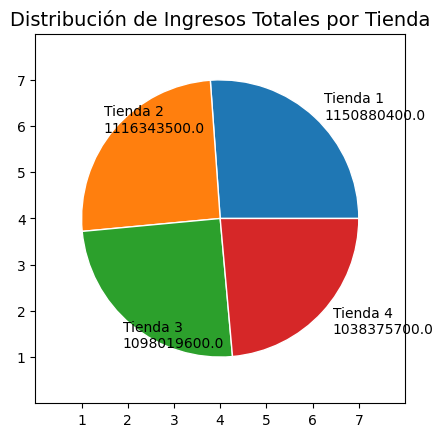

In [3]:
# Muestra el total de Ingreso de Ventas
print("Total de Ingreso de ventas para la tienda 1:", total_tienda1)
print("Total de Ingreso de ventas para la tienda 2:", total_tienda2)
print("Total de Ingreso de ventas para la tienda 3:", total_tienda3)
print("Total de Ingreso de ventas para la tienda 4:", total_tienda4)
# plot
import matplotlib.pyplot as plt
import numpy as np
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, naranja, verde, rojo
fig, ax = plt.subplots()

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
Totales = [total_tienda1, total_tienda2, total_tienda3, total_tienda4]
labels = [f"{nombre}\n{total}" for nombre, total in zip(nombres_tiendas, Totales)]
#plt.pie(Totales, labels=labels, colors=colores, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax.pie(Totales, labels=labels, colors=colores, radius=3, center=(4, 4),
wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
plt.title('Distribución de Ingresos Totales por Tienda', fontsize=14)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

# 2. Ventas por categoría

tiendas 1     Categoría del Producto  Cantidad
0  Artículos para el hogar       171
1     Deportes y diversión       284
2        Electrodomésticos       312
3             Electrónicos       448
4   Instrumentos musicales       182
5                 Juguetes       324
6                   Libros       173
7                  Muebles       465

La categoría más vendida en la tienda 1 es: Muebles con 465 ventas.

La categoría menos vendida en la tienda 1 es: Artículos para el hogar con 171 ventas.

tiendas 2     Categoría del Producto  Cantidad
0  Artículos para el hogar       181
1     Deportes y diversión       275
2        Electrodomésticos       305
3             Electrónicos       422
4   Instrumentos musicales       224
5                 Juguetes       313
6                   Libros       197
7                  Muebles       442

La categoría más vendida en la tienda 2 es: Muebles con 442 ventas.

La categoría menos vendida en la tienda 2 es: Artículos para el hogar con 181 ventas.



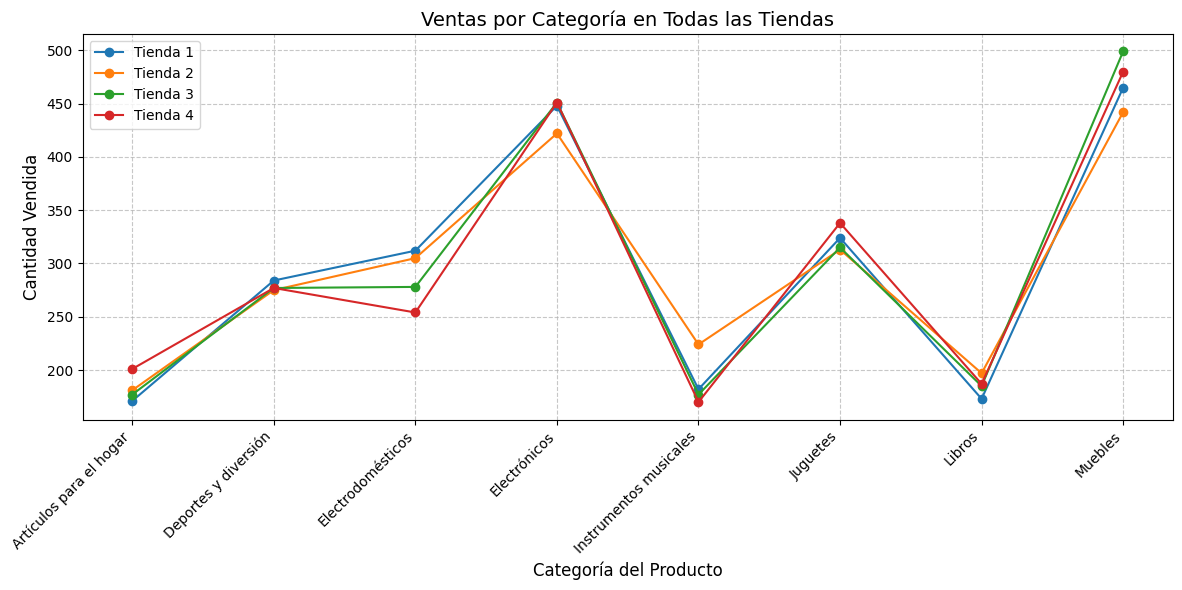

In [4]:
#Categorias mas vendidas Lista de tiendas categoria del producto
contador =1
tiendas = [tienda, tienda2, tienda3, tienda4]
nombre_tienda = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
# Preparar datos para el gráfico de líneas
plt.figure(figsize=(12, 6))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, naranja, verde, rojo
categorias_totales = []
cantidades_totales = []
for t in tiendas:
  Ventas_por_categoria = t.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
  print(f'tiendas {contador} {Ventas_por_categoria}\n')
  if Ventas_por_categoria is not None:
    cantidad_mas_vendida = Ventas_por_categoria.loc[Ventas_por_categoria['Cantidad'].idxmax()]
    cantidad_menos_vendida = Ventas_por_categoria.loc[Ventas_por_categoria['Cantidad'].idxmin()]
    categorias_totales.append(Ventas_por_categoria['Categoría del Producto'])
    cantidades_totales.append(Ventas_por_categoria['Cantidad'])
    print(f"La categoría más vendida en la tienda {contador} es: {cantidad_mas_vendida['Categoría del Producto']} con {cantidad_mas_vendida['Cantidad']} ventas.\n")
    print(f"La categoría menos vendida en la tienda {contador} es: {cantidad_menos_vendida['Categoría del Producto']} con {cantidad_menos_vendida['Cantidad']} ventas.\n")
  contador +=1
 # Graficar
for i in range(len(tiendas)):
    plt.plot(categorias_totales[i], cantidades_totales[i], marker='o', label=nombre_tienda[i],  color=color[i])
# Configurar el gráfico
plt.title('Ventas por Categoría en Todas las Tiendas', fontsize=14)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'ventas_por_categoria.png')
plt.tight_layout()

#plt.xlabel('Categoría del Producto')
#plt.ylabel('Cantidad de Ventas')
#plt.title('Categorías más Vendidas por Tienda')
#plt.legend()
plt.show()

# 3. Calificación promedio de la tienda


La calificación promedio de la tienda 1 es: 3.976685036032217
La calificación promedio de la tienda 2 es: 4.037303942348453
La calificación promedio de la tienda 3 es: 4.048325561678677
La calificación promedio de la tienda 4 es: 3.9957591178965224


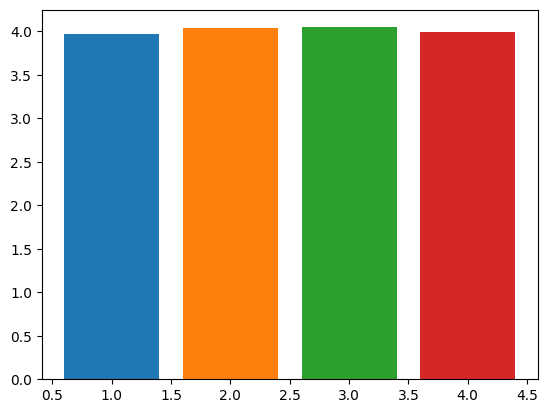

In [ ]:
from matplotlib import pyplot as plt
contador =1
for t in tiendas:
  calificacion_promedio = t['Calificación'].mean()
  plt.bar(x= contador, height=calificacion_promedio)
  print(f"La calificación promedio de la tienda {contador} es: {calificacion_promedio}")
  contador +=1
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
contador =1
for t in tiendas:
  max_cantidad_vendida_por_Tienda = t.groupby('Producto').size().reset_index(name='Cantidad').max()
  min_cantidad_vendida = t.groupby('Producto').size().reset_index(name='Cantidad').min()
  print(f"Productos más vendidos por tienda {contador}:")
  print(max_cantidad_vendida_por_Tienda)
  print(f"\nProductos menos vendidos por tienda {contador}:")
  print(min_cantidad_vendida)
  contador +=1

Productos más vendidos por tienda 1:
Producto    Vaso térmico
Cantidad              60
dtype: object

Productos menos vendidos por tienda 1:
Producto    Ajedrez de madera
Cantidad                   33
dtype: object
Productos más vendidos por tienda 2:
Producto    Vaso térmico
Cantidad              65
dtype: object

Productos menos vendidos por tienda 2:
Producto    Ajedrez de madera
Cantidad                   32
dtype: object
Productos más vendidos por tienda 3:
Producto    Vaso térmico
Cantidad              57
dtype: object

Productos menos vendidos por tienda 3:
Producto    Ajedrez de madera
Cantidad                   35
dtype: object
Productos más vendidos por tienda 4:
Producto    Vaso térmico
Cantidad              62
dtype: object

Productos menos vendidos por tienda 4:
Producto    Ajedrez de madera
Cantidad                   33
dtype: object


# 5. Envío promedio por tienda

In [ ]:
contador =1
for t in tiendas:
  envio_promedio = t['Costo de envío'].mean()
  print(f"El envío promedio de la tienda {contador} es: {envio_promedio}")
  contador +=1

El envío promedio de la tienda 1 es: 26018.60958033065
El envío promedio de la tienda 2 es: 25216.235693090293
El envío promedio de la tienda 3 es: 24805.680373039424
El envío promedio de la tienda 4 es: 23459.457167090754


Introducción
El presente informe tiene como objetivo sintetizar los hallazgos obtenidos a partir del análisis de ventas de diferentes tiendas, con el fin de recomendar al Sr. Juan la mejor opción para realizar sus compras. Se han considerado diversos factores, tales como los ingresos totales de las tiendas, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos, y el coste de envío promedio. A través de este análisis, se busca proporcionar una visión clara y objetiva que respalde la decisión final.
Resumen : La Tienda 4 tiene el menor rendimiento en ingresos y presencia geográfica, por lo que recomienda su venta.

Análisis de Datos
1. Ingresos Totales de las Tiendas
Se realizó un análisis de los ingresos totales generados por cada tienda. Los resultados indican que:

Total de Ingreso de ventas para la tienda 1: 1150880400.0
Total de Ingreso de ventas para la tienda 2: 1116343500.0
Total de Ingreso de ventas para la tienda 3: 1098019600.0
Total de Ingreso de ventas para la tienda 4: 1038375700.0


2. Categorías de Productos Más y Menos Vendidas
El análisis de las categorías de productos revela que:

Categorías Más Vendidas:

Tienda 1: Muebles
Tienda 2: Muebles
Tienda 3: Muebles
Tienda 4: Muebles
Categorías Menos Vendidas:

Tienda 1: Articulos para el hogar
Tienda 2: Articulos para el hogar
Tienda 3: Articulos para el hogar
Tienda 4: Instrumentos Musicales


3. Calificaciones Promedio de los Clientes por Tienda
Las calificaciones promedio de los clientes son un indicador importante de la satisfacción del cliente. Los resultados son los siguientes:

La calificación promedio de la tienda 1 es: 3.976685036032217
La calificación promedio de la tienda 2 es: 4.037303942348453
La calificación promedio de la tienda 3 es: 4.048325561678677
La calificación promedio de la tienda 4 es: 3.9957591178965224


4. Productos Más y Menos Vendidos
El análisis de los productos más y menos vendidos muestra que:

Productos Más Vendidos:
Productos más vendidos por tienda 1:
Producto Vaso térmico
Cantidad 60


Productos más vendidos por tienda 2:
Producto Vaso térmico
Cantidad 65

Productos más vendidos por tienda 3:
Producto Vaso térmico
Cantidad 57

Productos más vendidos por tienda 4:
Producto Vaso térmico
Cantidad 62


Productos Menos Vendidos:


Productos menos vendidos por tienda 1:
Producto de ajedrez de madera
Cantidad 33

Productos menos vendidos por tienda 2:
Producto de ajedrez de madera
Cantidad 32

Productos menos vendidos por tienda 3:
Producto de ajedrez de madera
Cantidad 35

Productos menos vendidos por tienda 4:
Producto de ajedrez de madera
Cantidad 33


5. Coste de Envío Promedio para Cada Tienda
El coste de envío promedio también es un factor a considerar. Los resultados son:

El envío promedio de la tienda 1 es: 26018.60958033065
El envío promedio de la tienda 2 es: 25216.235693090293
El envío promedio de la tienda 3 es: 24805.680373039424
El envío promedio de la tienda 4 es: 23459.457167090754




## 7. Conclusiones y Recomendaciones

Conclusión

Basándonos en el análisis de facturación total, la tienda D muestra ingresos significativamente menores en comparación con las otras tiendas. Además, su promedio de evaluación es el más bajo y sus costos de envío son los más altos. Por lo tanto, recomendamos al señor Juan considerar la venta de la tienda 4 para invertir en un nuevo negocio."


Ingresos Totales: La tienda ha demostrado tener los ingresos más altos, lo que sugiere una buena aceptación en el mercado.
Categorías Más Vendidas: Las categorías más vendidas son relevantes para las necesidades del Sr. Juan, lo que indica que encontrará productos de su interés.
Calificaciones de Clientes: La alta calificación promedio sugiere un buen nivel de satisfacción entre los clientes, lo que es crucial para una experiencia de compra positiva.
Coste de Envío: El coste de envío promedio es competitivo, lo que puede influir en la decisión de compra.
